In [1]:
!pip install numpy
!pip install matplotlib

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def aceleracion(x):
  return -x

In [4]:
#Condiciones iniciales 
r0 = np.array([1.,0.])
TMin = 0.
TMax = 10. 
n = 300
t = np.linspace(TMin, TMax, n)
h = (TMax-TMin)/(n-1)
x0 = 1
dx0 = 0

In [17]:
#Datos de la literatura:
c1 = (1)/(2*(2-(2)**(1/3)))
c2 = (1-(2)**(1/3))/(2*(2-(2)**(1/3)))
c = np.array([c1,c2,c2,c1])
d1 = (1)/(2-(2)**(1/3))
d2 = (-2**(1/3))/(2-(2)**(1/3))
d4 = 0
d = np.array([d1,d2,d1,d4])

In [12]:
def Yoshida():

    t = np.linspace(TMin, TMax, n)
    dt = t[1]-t[0]
    x = np.zeros(len(t))
    v = np.zeros(len(t))
    
    v[0] = r0[1]
    x[0] = r0[0]
    
    for i in range(1,len(x)):
        xi1 = x[i-1] + c[0]*v[i-1]*dt
        vi1 = v[i-1] + d[0]*aceleracion(xi1)*dt
        
        xi2 = xi1 + c[1]*vi1*dt
        vi2 = vi1 + d[1]*aceleracion(xi2)*dt
        
        xi3 = xi2 + c[2]*vi2*dt
        vi3 = vi2 + d[2]*aceleracion(xi3)*dt
        
        xi4 = xi3 + c[3]*vi3*dt
        vi4 = vi3 + d[3]*aceleracion(xi4)*dt
        
        x[i] = xi4
        v[i] = vi4
        
    return x,v

yoshiX,yoshiV = Yoshida()
yoshiY = 0.5*yoshiX**2+0.5*yoshiV**2

Método de la clase: 

In [13]:
def GetLeapFrog(r0,t):
    
    N = len(t)
    h = t[1] - t[0]
    
    t1 = np.arange(TMin - 0.5*h, TMax - 0.5*h + h, h)
    
    x = np.zeros(N)
    v = np.zeros(N) # El inicializador

    x[0] = r0[0]
    v[0] = r0[1] - 0.5*h*aceleracion(x[0])
    
    for i in range(1,N):
        
        v[i] = v[i-1] + h*aceleracion(x[i-1])
        x[i] = x[i-1] + h*v[i]
    
    # Igualando los array
    X = np.array([])
    for i in range(len(x)-1):
        X = np.append(X,(x[i]+x[i+1])*0.5)

    V = v[1:]
    
    #print(len(X),len(V))
    
    return X,V

In [14]:
x, v = GetLeapFrog(r0,t)
ener = (0.5*(x)**2)+(0.5*(v)**2)

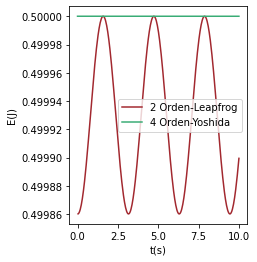

In [18]:
fig0 = plt.figure(figsize=(7,4))
ax = fig0.add_subplot(1, 2, 1)
ax.plot(t[1:],ener, label='2 Orden-Leapfrog', color = '#A2282F')
ax.plot(t,yoshiY,label='4 Orden-Yoshida', color = '#39AC75')
ax.legend(loc=0)
ax.legend(loc=0)
plt.xlabel('t(s)')
plt.ylabel('E(J)')
plt.show()